In [ ]:
#Image preperation for Blue Regions of Light

In [1]:
#save Ram from exploding
#Begone memory
def memory():
    def Begone_memory(exceptions=None):
        if exceptions is None:
            exceptions = []

        for var in list(globals().keys()):
            if var not in exceptions:
                del globals()[var]
    Begone_memory()
    def Begone_memory(exceptions=None):
        if exceptions is None:
            exceptions = []

        for var in list(globals().keys()):
            if var not in exceptions:
                del globals()[var]
memory()
from skimage.filters import threshold_otsu
import tifffile
from skimage.io import imread, imsave
from scipy.ndimage import center_of_mass
from PIL import Image
import re
from skimage import io, measure, color
import os
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
import numpy as np
import glob

In [2]:
#load the Blue light raw data
datafile_2nd_with_light = r"A:\3rd_Year_Project\Project_code\data\Raw_Data\secondwithlight_MMStack_Default.ome.tif"
datafile_15_percent = f'A:/3rd_Year_Project/Project_code/data/Raw_Data/15percent_MMStack_Default.ome-001.tif'

#load the 15% raw data
# Use memmap to load the TIFF file lazily
with tifffile.TiffFile(datafile_15_percent) as tif:
    # Map the image data to memory instead of loading it entirely into memory
    data = tif.asarray()

#data = io.imread(datafile)
data_15B = data[:, 0, :, :]  # Assuming you want to skip the first index (0) and keep the rest

print(f"Datafile contents: {datafile_15_percent}")
print(f"Data shape: {data_15B.shape}")  # Print the shape to understand the data structure

#load the 2nd light data
# Use memmap to load the TIFF file lazily
with tifffile.TiffFile(datafile_2nd_with_light) as tif:
    # Map the image data to memory instead of loading it entirely into memory
    data = tif.asarray()

#data = io.imread(datafile)
data_2ndB = data[:, 1, :, :]  # Assuming you want to skip the first index (0) and keep the rest

print(f"Datafile contents: {datafile_2nd_with_light}")
print(f"Data shape: {data_2ndB.shape}")  # Print the shape to understand the data structure

Datafile contents: A:/3rd_Year_Project/Project_code/data/Raw_Data/15percent_MMStack_Default.ome-001.tif
Data shape: (600, 1200, 1200)
Datafile contents: A:\3rd_Year_Project\Project_code\data\Raw_Data\secondwithlight_MMStack_Default.ome.tif
Data shape: (300, 1200, 1200)


In [3]:
#save as np
np.save("A:/3rd_Year_Project/Project_code/data/Loaded_Raw_Data/Blue light/saved_blue_15_percent.npy", data_15B)
np.save("A:/3rd_Year_Project/Project_code/data/Loaded_Raw_Data/Blue light/saved_blue_2ndlight.npy", data_2ndB)

print("Saved data as .npy files.")

Saved data as .npy files.


In [4]:
#load the blue light data
# File paths
BlueLight15_path = "A:/3rd_Year_Project/Project_code/data/Loaded_Raw_Data/Blue light/saved_blue_15_percent.npy"
BlueLight2nd_path = "A:/3rd_Year_Project/Project_code/data/Loaded_Raw_Data/Blue light/saved_blue_2ndlight.npy"

# Load .npy files
BlueLight15 = np.load(BlueLight15_path)  # This is now a NumPy array
BlueLight2nd = np.load(BlueLight2nd_path)

In [5]:
#print the image of the Blue light maps
#plt.imshow(BlueLight15[1, :, :], cmap="gray")  # Assuming index 1 is your image slice
#plt.title("Blue Light Image")
#print(BlueLight15.shape)
#plt.show()

#plt.imshow(BlueLight2nd[1, :, :], cmap="gray")
#plt.title("Blue Light Image")
#print(BlueLight2nd.shape)
#plt.show()

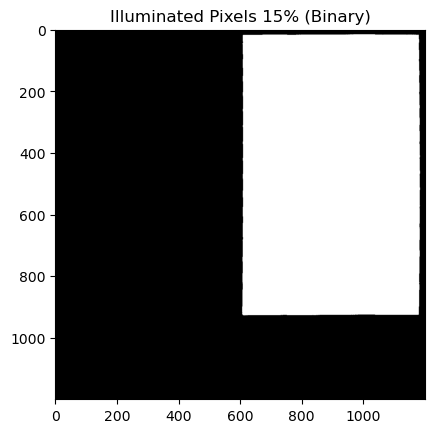

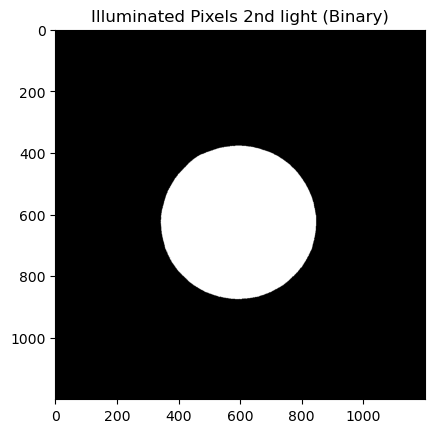

Saved data as .npy files.


In [6]:
#Find the Blue Zones
list_15 = []
list_2nd = []

threshold15 = 1000
for i in range(600):
    binary_mask = BlueLight15[i, :, :] > threshold15  # True = illuminated, False = dark
    list_15.append(binary_mask)

plt.imshow(list_15[0], cmap="gray")
plt.title("Illuminated Pixels 15% (Binary)")
plt.show()

threshold2nd = 230
for i in range(300):
    binary_mask = BlueLight2nd[i, :, :] > threshold2nd
    list_2nd.append(binary_mask)

plt.imshow(list_2nd[0], cmap="gray")
plt.title("Illuminated Pixels 2nd light (Binary)")
plt.show()

#save as np
np.save("A:/3rd_Year_Project/Project_code/data/Distinguished_Blue_Zones/15_Zones.npy", list_15)
np.save("A:/3rd_Year_Project/Project_code/data/Distinguished_Blue_Zones/2nd_Zones.npy", list_2nd)

print("Saved data as .npy files.")

In [7]:
print(list_15[0])

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
